# Chapter 1 - Euler's Method of Integration

## Ex 1.1-1.3 Radioactive Decay

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt



Given a time $t$, characteristic decay time $\tau$, and a number of atoms $N_u$ to start with, we can estimate the number of nuclear decays per a given time step:
$$ N_u(t+\Delta t) = N_u(t) - \frac{N_u(t)}{\tau}\Delta t $$

Once we calculate this value once, we can then use that new value to repeat the calculation and see how many atoms are left one time step later. We'll do this via a for loop that iterates over a set number of time and time steps, for a certain number of initial atoms to start with.

I'll start with the textbook example, using a characteristic time of 1 for simplicity.

In [3]:
# Define parameters for the radioactive decay equation from textbook
tau = 1
dt = 0.1 # check every tenth of a second
n_steps = 100 # 10 seconds 

In [4]:
# Intitialize arrays
t = np.zeros(n_steps + 1) # add one entry to store initial conditions
N = np.zeros(n_steps + 1)

# Set the starting time and initial number of atoms
t[0] = 0.0 
N[0] = 100 

# Loop through each entry in the time and number arrays
for i in range(n_steps): 
    N[i+1] = N[i] - (N[i]/tau)*dt # calculate new number of atoms
    t[i+1] = t[i] + dt # calculate new time

# Print out the number of atoms decayed, and the time elapsed
atoms_decayed = N[0] - N[-1]
time_elapsed = t[-1] - t[0]
print("Estimated number of atoms decayed: {:.10}".format(atoms_decayed), "in {:1}".format(time_elapsed), "seconds")

Estimated number of atoms decayed: 99.99734386 in 9.99999999999998 seconds


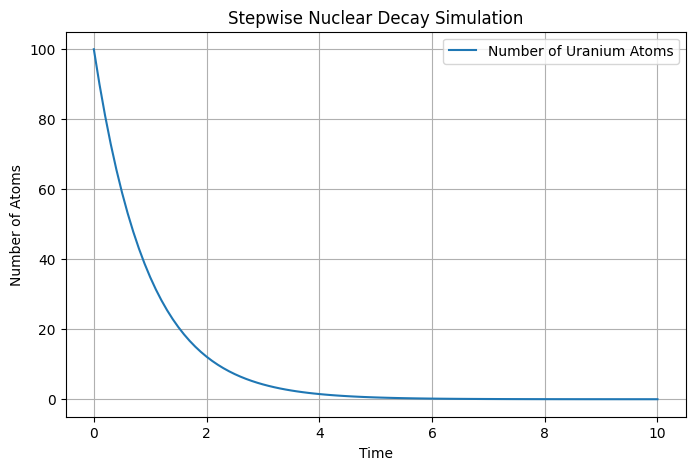

In [5]:
# Plot a figure that shows number of atoms left over time
plt.figure(figsize=(8, 5))
plt.plot(t, N, label='Number of Uranium Atoms')
plt.xlabel('Time')
plt.ylabel('Number of Atoms')
plt.title('Stepwise Nuclear Decay Simulation')
plt.legend()
plt.grid(True)
plt.show()

I'd like to experiment to see how the accuracy of the Euler integration changes with different time steps, but I don't want to have to recreate the loop over and over so I'll just define a function here. 

In [6]:
def simulate_decay(N0, tau, dt, n_steps):

    # Initialize arrays
    t = np.zeros(n_steps + 1)
    N = np.zeros(n_steps + 1)
    
    # Set the initial conditions as defined in function
    t[0] = 0.0
    N[0] = N0
    
    # Perform the Euler integration for each time step
    for i in range(n_steps):
        # Update the number of atoms
        N[i + 1] = N[i] - (N[i] / tau) * dt
        # Update the time
        t[i + 1] = t[i] + dt
        
    # Calculate the total number of atoms decayed
    atoms_decayed = N0 - N[-1]

    # Return the arrays for time, number of atoms left, and atoms decayed
    return t, N, atoms_decayed

Now we'll use this function to run a series of calculations with different time steps.

In [7]:
# Define new variables for other timesteps
dt1 = 1
dt05=0.5
dt01=0.1
dt001=0.001

# Set number of starting atoms
N0 = 100

In [8]:
# Run the calculation function with each timestep, adjusting number of steps so we cover the same time period
t_1, N_1, atoms_decayed_1 = simulate_decay(N0, tau, dt1, n_steps)
t_05, N_05, atoms_decayed_05 = simulate_decay(N0, tau, dt05, n_steps*5)
t_01, N_01, atoms_decayed_01 = simulate_decay(N0, tau, dt01, n_steps*10)
t_001, N_001, atoms_decayed_001 = simulate_decay(N0, tau, dt001, n_steps*100)

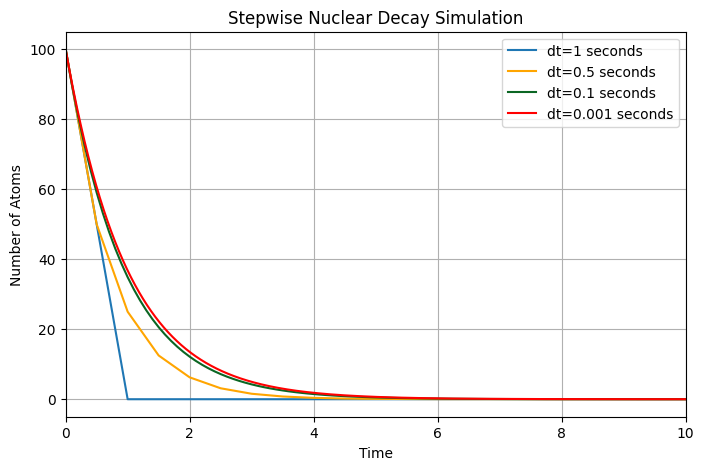

In [9]:
# Plot all the timesteps to see how it gets more precise over time
plt.figure(figsize=(8, 5))

plt.plot(t_1, N_1, label='dt=1 seconds')
plt.plot(t_05, N_05, label='dt=0.5 seconds', color='orange')
plt.plot(t_01, N_01, label='dt=0.1 seconds', color='#0B6623', markersize=5)
plt.plot(t_001, N_001, label='dt=0.001 seconds', color='red', alpha=1, markersize=1)

plt.xlabel('Time')
plt.xlim(0,10)
plt.ylabel('Number of Atoms')
plt.title('Stepwise Nuclear Decay Simulation')
plt.legend()
plt.grid(True)

plt.show()

So we can see that the usefulness of the extra timesteps is not getting us that much closer to the theoretical prediction. Depending on need for precision, it may not be worth the compuational expense. 

## 1.1 A freely falling object

An object in free fall, subject only to gravity, experiences force: $$\frac{dv}{dt} = -g$$ and given an objects initial velocity, we can get an idea of how it changes over time by integrating using Euler's method in the same way as above. 

C:\Users\smick\AppData\Local\Temp\ipykernel_16952\2291108997.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


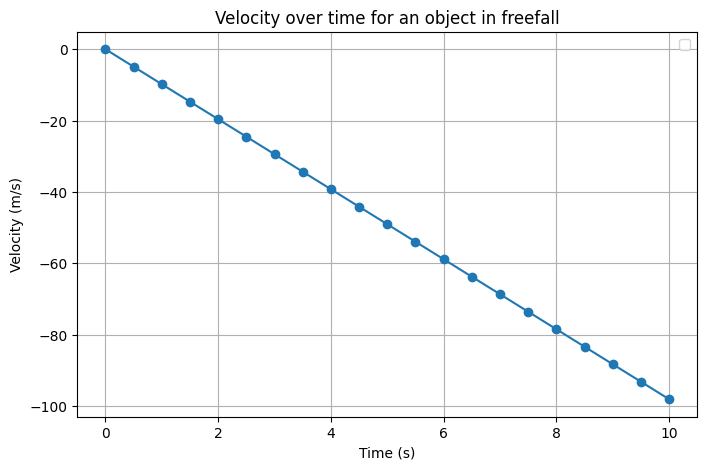

In [ ]:
# Set parameters for object
v0 = 0 # initial velocity
t0 = 0 # starting time
dt = 0.5 # time step
n_steps = 20 # 10 seconds total
g = 9.81 # gravity on Earth

v = np.zeros(n_steps + 1) 
t = np.zeros(n_steps + 1)
 
# Set initial conditions
v[0] = v0
t[0] = t0

for i in range(n_steps): 
    v[i+1] = v[i] - g*dt # v = v0 + v*t
    t[i+1] = t[i] + dt


plt.figure(figsize=(8, 5))

plt.plot(t, v)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity over time for an object in freefall')
plt.legend()
plt.grid(True)

plt.show()

Just to compare this with the position and acceleration, I'll plot a 3-panel figure to show them all side-by-side. First, I'll compute the position as a function of time. 

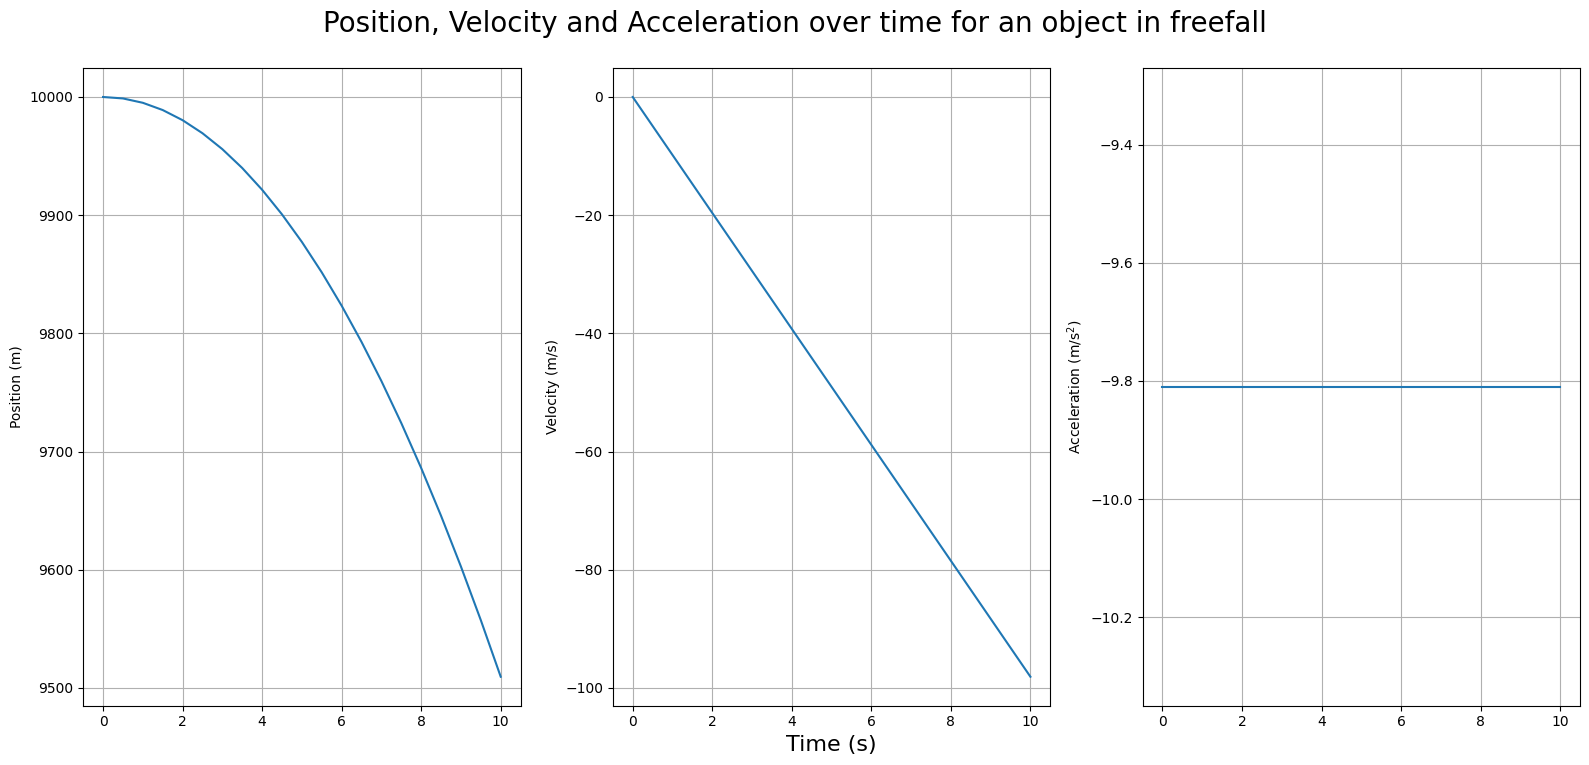

In [13]:
# Set initial position
pos0 = 10000 # 10km height

# Initialize position and acceleration arrays
pos = np.zeros(n_steps + 1)
acc = np.zeros(n_steps + 1)

# Set initial position and fill acceleration array with constant value
pos[0] = pos0
acc.fill(-g) 

# Loop through and create the new positions using Euler's integration
for i in range(n_steps):
    pos[i + 1] = pos[i] + v[i]*dt + 0.5*acc[i]*dt**2 # x = x0 + vt + at^2
    t[i + 1] = t[i] + dt 

fig, ax = plt.subplots(1,3, figsize=(16, 8))
ax.ravel()

# Position 
ax[0].plot(t, pos)
ax[0].set_ylabel('Position (m)')
ax[0].grid(True)

# Velocity
ax[1].plot(t, v)
ax[1].set_ylabel('Velocity (m/s)')
ax[1].grid(True)

# Acceleration
ax[2].plot(t, acc)
ax[2].set_ylabel(r"Acceleration (m/s$^2$)")
ax[2].grid(True)

# Set general title and plot
fig.suptitle('Position, Velocity and Acceleration over time for an object in freefall', fontsize=20, y=0.95)
ax[1].set_xlabel('Time (s)', fontsize=16, y=0.01)
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## 1.3 Applying a simplified drag force

We can consider a object with a general equation for velocity $$ \frac{dv}{dt} = a - bv $$ and consider how this impacts free fall velocity.

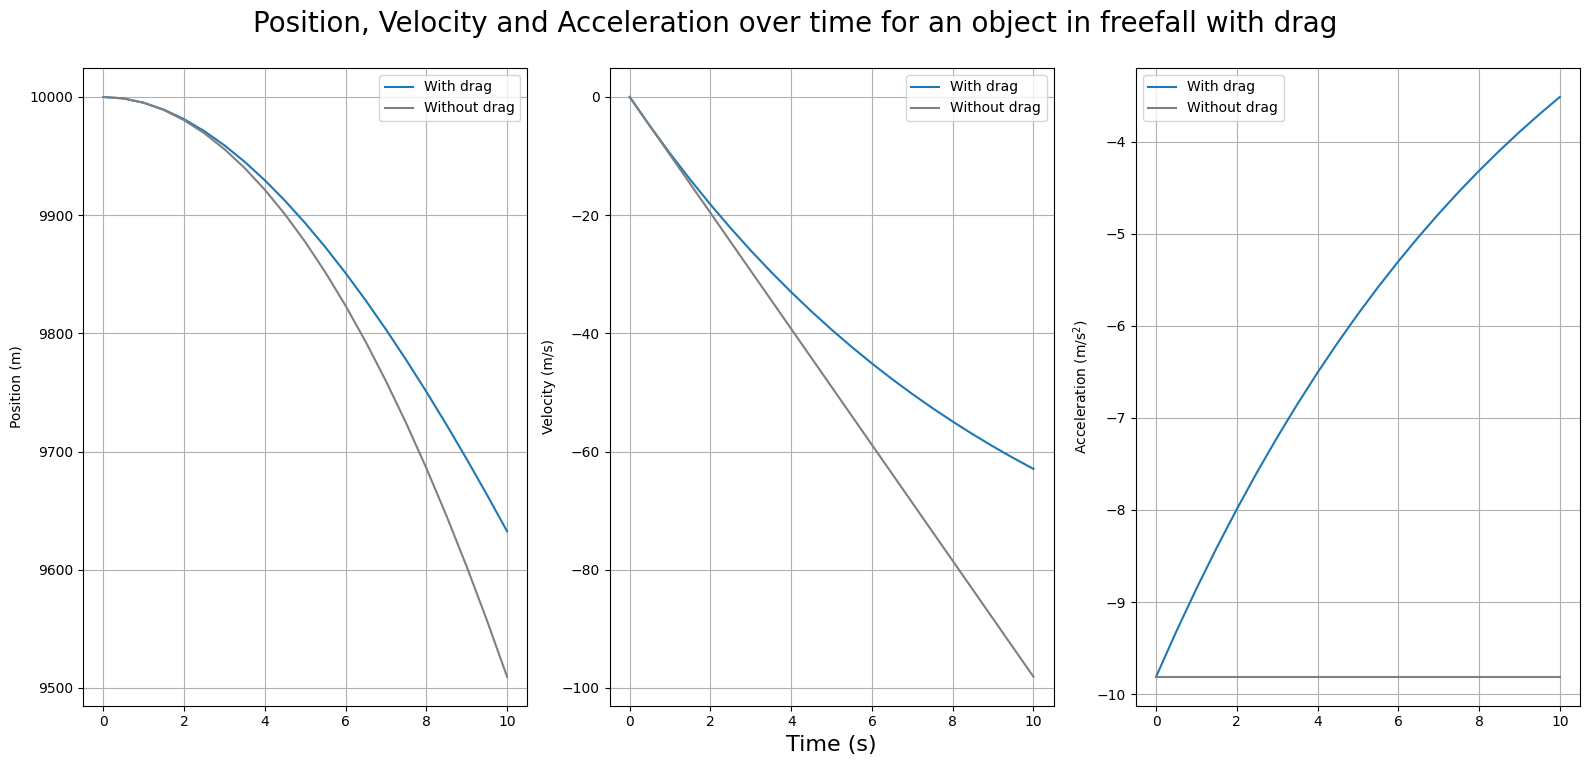

In [12]:
# Set parameters
g = 9.81               # gravitational acceleration (m/s^2)
v0 = 0.0               # initial velocity (m/s)
pos0 = 10000.0         # initial position (m)
dt = 0.5               # time step (s)
n_steps = 20           # number of steps (for a total time = 20*dt seconds)

# For the drag term
a_const = -g         # constant term (gravity)
b = -0.1             # drag coefficient (1/s); negative so that drag opposes motion

# Initialize position and acceleration arrays
pos_w_drag = np.zeros(n_steps + 1)
acc_w_drag = np.zeros(n_steps + 1)

# Set initial position and fill acceleration array with constant value
t_with_drag   = np.zeros(n_steps + 1)
pos_w_drag = np.zeros(n_steps + 1)
vel_with_drag   = np.zeros(n_steps + 1)
acc_w_drag = np.zeros(n_steps + 1)

# Set initial conditions
t_with_drag[0] = 0.0
pos_w_drag[0] = pos0
vel_with_drag[0] = v0
acc_w_drag[0] = a_const + b * vel_with_drag[0] 

# Loop through and create the new positions, velocities and accelerations for each timestep using Euler's integration
for i in range(n_steps):
    
    # Position
    pos_w_drag[i + 1] = pos_w_drag[i] + vel_with_drag[i]*dt + 0.5*acc_w_drag[i]*dt**2 # x = x0 + vt + at^2
    
    # Velocity
    vel_with_drag[i+1] = vel_with_drag[i] + acc_w_drag[i]*dt

    # Time
    t_with_drag[i + 1] = t_with_drag[i] + dt

    # Acceleration
    acc_w_drag[i+1] = a_const + b*vel_with_drag[i+1]


# Plot a 3-panel figure
fig, ax = plt.subplots(1,3, figsize=(16, 8))
ax.ravel()

# Position 
ax[0].plot(t_with_drag, pos_w_drag, label='With drag')
ax[0].plot(t, pos, color='grey', label='Without drag')
ax[0].set_ylabel('Position (m)')
ax[0].legend()
ax[0].grid(True)

# Velocity
ax[1].plot(t_with_drag, vel_with_drag, label='With drag')
ax[1].plot(t, v, color='grey', label='Without drag')
ax[1].set_ylabel('Velocity (m/s)')
ax[1].legend()
ax[1].grid(True)

# Acceleration
ax[2].plot(t_with_drag, acc_w_drag, label='With drag')
ax[2].plot(t, acc, color='grey', label='Without drag')
ax[2].legend()
ax[2].set_ylabel(r"Acceleration (m/s$^2$)")
ax[2].grid(True)

# Set general title and plot
fig.suptitle('Position, Velocity and Acceleration over time for an object in freefall with drag', fontsize=20, y=0.95)
ax[1].set_xlabel('Time (s)', fontsize=16, y=0.01)
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()